***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* 8. Calibration 
    * Previous: [8.3 2GC calibration: direction-independent self-calibration]()
    * Next: []()

***

Import standard modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import section specific modules:

In [2]:
from IPython.display import Image

## 8.4 3GC Calibration: direction-dependent self-calibration

As explained in [Chapter 7 &#10142;](../7_Observing_Systems/7_0_introduction) , the increased field-of-view of modern telescopes 
causes direction-dependent effects, like the primary beam and pointing error, to become apparent. We can therefore no longer merely rely on using direction-independent selfcal (see [Sec. 8.3 &#10142;](../8_Calibration/8_3_2GC.ipynb)). There are in principal many approaches one can use to perform direction-dependent calibration (see [Sec. 8.4.1 &#10549;](#cal:sec:p_versus_h) for more details).

I this section we will mainly concentrate on one specific approach: *differential gains* ([<cite data-cite='Smirnov2011'>Revisiting the radio interferometer measurement equation-II.  Calibration and direction-dependent effects</cite> &#10548;](http://arxiv.org/abs/1101.1765)). The reason being, this approach provides a nice framework with which one can build up some intiution as to how direction-dependent calibration differs from direction-independent calibration.

In [Sec. 7.2 &#10142;](../7_Observing_Systems/7_2_rime.ipynb) the following equation was
presented:

\begin{equation}
\mathbf{V}_{pq} = \mathbf{G}_p\mathbf{X}_{pq}\mathbf{G}_q^H,
\end{equation}

This equation is known as the all-sky RIME, where $\mathbf{V}_{pq}$ is the $2\times2$ correlation matrix that the interferometer measured and $\mathbf{X}_{pq}$ is the $2\times2$ coherency matrix. Moreover, $\mathbf{G}_p$ and $\mathbf{G}_q$ are G-Jones antenna matrices. During calibration we estimate $\mathbf{G}_p$ and $\mathbf{G}_p$ which we then in turn use to correct the correlation matrix $\mathbf{V}_{pq}$. The subscripts $p$ and $q$ denote the antennas with which the measurement was made. Furthermore, $\mathbf{X}_{pq} = \sum_s \mathbf{X}_{spq}$, with $s$ being the source index. The implication being, we assume that the error that corrupts our visibilities is independent of the source's position. As explained in [Sec. 7.3 &#10142;](../7_Observing_Systems/7_3_direction_independent_and_dependent_effects.ipynb), this assumption is violated when we work with a larger field-of-view. As an example, the primary beam of an instrument varies significantly over a large field-of-view (generally in time and frequency). In the case of the primary beam we could try to model the direction dependent effect by adding an a-priori $\mathbf{E}$ Jones matrix to our Jones' chain (see [<cite data-cite='Mitra2015'>Incorporation of antenna primary beam patterns in radio-interferometric data reduction to produce wide-field, high-dynamic-range images</cite> &#10548;](http://ieeexplore.ieee.org/Xplore/defdeny.jsp?url=http%3A%2F%2Fieeexplore.ieee.org%2Fstamp%2Fstamp.jsp%3Ftp%3D%26arnumber%3D7297163%26userType%3Dinst&denyReason=-134&arnumber=7297163&productsMatched=null&userType=inst)). However, if we do not have any information about the physical source that is responsible for a direction dependent effect then we could use the idea of differential gains instead. In addition to to the direction-independent gain every source experiences we add a differential gain which could be different for each source. Mathematically, we can express this as

\begin{equation}
\mathbf{V}_{pq} = \mathbf{G}_p \left (\sum_s\Delta\mathbf{E}_{sp}\mathbf{X}_{spq}\Delta\mathbf{E}_{sq}^H \right) \mathbf{G}_q^H,
\end{equation}
where $\Delta\mathbf{E}_{sp}$ and $\Delta\mathbf{E}_{sq}^H$ are the differential gains associated with source $s$ and antenna $p$ and $q$ respectively.
We now use the above equation and least squares (see [Sec. 8.1 &#10142;](../8_Calibration/8_1_Calibration_Least_Squares_Problem.ipynb)) to estimate the unknown diferrential and direction independent gains, which we can then subsequently use to correct our correlation measurements. 

Another question now arises, how do we know if a source requires a diferential gain? Fig. [&#10549;](#cal:fig:dir_dep) <!--\ref{cal:fig:dir_dep}--> helps to answer this question. 

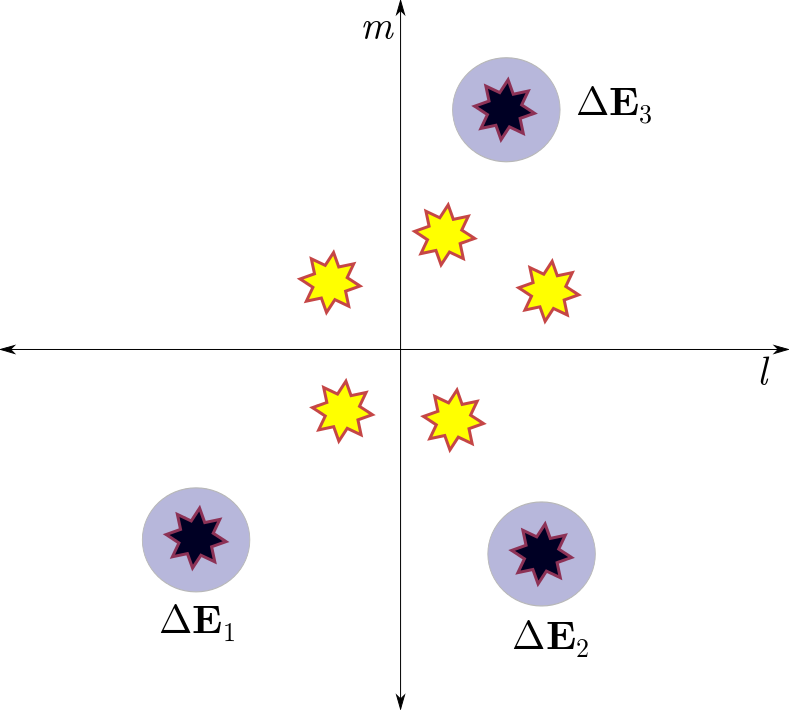

In [6]:
Image(filename='figures/dir_dep.png', width=300, height=100)

*Caption: Which sources require a differential gain?.*<a id='cal:fig:dir_dep'></a> <!--\label{pos:dir:dep}-->

We can learn two main things from Fig. [&#10549;](#cal:fig:dir_dep) <!--\ref{cal:fig:dir_dep}-->:

1. In practise it is easy to spot a source which requires a differential gain (in addition to the direction independent gain which affects all sources). The sources
which require a differential gain are usually surrounded by a lot of imaging artefacts, which is what the purple region around the black sources represent. The yellow sources therefore are not affected by direction dependent effects (no imaging artefacts around them), while the black sources are.
2. The further a source is from the field center, the more likely it is to be affected by a direction depedent effect.

### 8.4.1 Physics-based and heuristic approaches <a id='cal:sec:p_versus_h'></a> <!--\label{cal:sec:p_versus_h}-->

3GC can in general be divided into *physics-based* and *heuristic* approaches. If 
we know the underlying physical phenomenon which is responsible for a specific direction-dependent effect we may employ a physics-based calibration approach. Once we know the source of a direction-dependent effect we can try and construct a physical model for it which we then parameterize. The aim then is to try and solve the parameters of this model, i.e. we perform *parameter estimation*. In other cases the direction-dependent phenomenon is well defined a-priori and we just need to correctly incorporate it whilst calibrating. The following list contain example physics-based approaches:

* *Pointing-selfcal*: [<cite data-cite='Bhatnagar2004'>EVLA Memo 84. Solving for the antenna based pointing errors</cite> &#10548;](www.aoc.nrao.edu/evla/geninfo/memoseries/evlamemo84.ps) 
* *Kalman filter*: [<cite data-cite='Tasse2014'>Nonlinear Kalman filters for calibration in radio interferometry</cite> &#10548;](http://arxiv.org/abs/1403.6308) 
* *Primary beam*: [<cite data-cite='Mitra2015'>Incorporation of antenna primary beam patterns in radio-interferometric data reduction to produce wide-field, high-dynamic-range images</cite> &#10548;](http://ieeexplore.ieee.org/Xplore/defdeny.jsp?url=http%3A%2F%2Fieeexplore.ieee.org%2Fstamp%2Fstamp.jsp%3Ftp%3D%26arnumber%3D7297163%26userType%3Dinst&denyReason=-134&arnumber=7297163&productsMatched=null&userType=inst) 

It is not a trivial thing to correct for a direction-dependent effect, whether it is known a-priori or from calibration. The following list contains some approaches that have been proposed to accomplish this:

* *Facetting*: [<cite data-cite='Cornwell1992'>Radio-interferometric imaging of very large fields-The problem of non-coplanar arrays</cite> &#10548;](http://adsabs.harvard.edu/abs/1992A%26A...261..353C) 
* *AW-projection*: [<cite data-cite='Batnagar2008'>Correcting direction-dependent gains in the deconvolution of radio interferometric images</cite> &#10548;](http://arxiv.org/abs/0805.0834) 

On the other side of the spectrum we have the heuristic approaches. In an heuristic approach
we do not know the physical source of a specific direction-dependent effect. We instead introduce a number of free-parameters which we then try to optimize over some user defined residual-norm. Some 3GC heuristic approaches are listed below:

* *Peeling*: [<cite data-cite='Noordam2004'>LOFAR calibration challenges</cite> &#10548;](http://proceedings.spiedigitallibrary.org/proceeding.aspx?articleid=847375)
* *Differential gains*: [<cite data-cite='Smirnov2011'>Revisiting the radio interferometer measurement equation-II.  Calibration and direction-dependent effects</cite> &#10548;](http://arxiv.org/abs/1101.1765)
* *Clustered calibration*: [<cite data-cite='Kazemi2013'>Clustered calibration: an improvement to radio interferometric direction-dependent self-calibration</cite> &#10548;](http://arxiv.org/abs/1301.0633)

Once we obtained a heuristic solution we can try to makes sense of it by fitting a physical model to it. Prime examples of this include: 

* *SPAM (source peeling and atmospheric modelling)*: [<cite data-cite='Intema2009'>Ionospheric calibration of low frequency radio interferometric observations using the peeling scheme-I. Method description and first results</cite> &#10548;](http://arxiv.org/abs/0904.3975)  
* *Primary beam shapes*: [<cite data-cite='Yatawatta2013'>Estimation of radio interferometer beam shapes using Riemannian optimization</cite> &#10548;](http://arxiv.org/abs/1209.4236)


### 8.4.2 Solver Development

As we explained in [Sec. 8.2 &#10142;](../8_Calibration/8_2_1GC.ipynb), the least-squares solver (see [Sec. 8.1 &#10142;](../8_Calibration/8_1_Calibration_Least_Squares_Problem.ipynb)) only became popular with the advent of self-calibration. Many improvements and alternatives to the least-squares solver, have since been developed. We list the most recent developments below:

* *Eigendecomposition*: [<cite data-cite='Boonstra2003'>Gain calibration methods for radio telescope arrays</cite> &#10548;](http://ieeexplore.ieee.org/xpl/freeabs_all.jsp?arnumber=1145704&abstractAccess=no&userType=inst)
* *SAGEcal*: [<cite data-cite='Kazemi2011'>Radio interferometric calibration using the SAGE algorithm</cite> &#10548;](http://arxiv.org/abs/1012.1722)
* *Robust calibration*: [<cite data-cite='Kazemi2013robust'>Robust radio interferometric calibration using the t-distribution</cite> &#10548;](http://arxiv.org/abs/1307.5040)
* *StEFCal*: [<cite data-cite='Salvini2014'>Fast gain calibration in radio astronomy using alternating direction implicit methods: Analysis and applications</cite> &#10548;](http://arxiv.org/abs/1410.2101)
* *Riemann-Manifold*: [<cite data-cite='Yatawatta2013'>Radio interferometric calibration using a Riemannian manifold</cite> &#10548;](http://arxiv.org/abs/1303.1029)
* *Blind Calibration*: [<cite data-cite='Kazemi2015'>Blind calibration for radio interferometry using convex optimization</cite> &#10548;](http://ieeexplore.ieee.org/xpl/freeabs_all.jsp?arnumber=7330285&abstractAccess=no&userType=inst)
* *Complex Optimization*: [<cite data-cite='Smirnov2015'>Radio interferometric gain calibration as a complex optimization problem</cite> &#10548;](http://arxiv.org/abs/1502.06974)
* *Kalman filter*: [<cite data-cite='Tasse2014'>Nonlinear Kalman filters for calibration in radio interferometry</cite> &#10548;](http://arxiv.org/abs/1403.6308)
